### ASTR 3300/5300-003: Astrostatistics
***N. Pol***
___

# Homework 4
### Due: Friday, Feb 21st at 11.59pm CST
---

## Problem 1

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_1.npy`. This is a (10 x 2) numpy array, with voltage measurements in the first column and heteroscedastic voltage uncertainties in the second column. Compute the sample mean and the standard error on the sample mean for this data.

2) Fit the appropriate ln-likelihood function and find the best-fit mean voltage.

3) Compute and plot the Bayesian posterior probability density (*not the log posterior*) for the mean voltage assuming a uniform prior for the mean in the range 3 to 7. Make sure this posterior pdf is normalized!

4) By either drawing samples from this posterior, or using your gridded posterior pdf to make a cdf, find the equal-tailed 68.3% credible region for the mean, and compare the upper and lower boundaries to the sample mean plus/minus the standard error, respectively. *Also* find the MAP value of the mean.

5) Repeat (3) and (4) this time with a prior on the mean that is uniform in the range 4.6 to 5.4. 

6) Now, imagine that we read an old paper about the experiment that gave us the voltage measurements, and they found that the mean was actually $6\pm0.3$. Repeat (3) and (4) this time with a Gaussian prior on the mean centered at $6$ with standard deviation of $0.3$.

7) Plot all of the normalized posterior pdfs for $\mu$ from (3), (5), and (6) on the same plot, making sure that the xlim of the plot spans 0 to 10.

8) You have made sure that the posterior pdfs are properly normalized, but until now you have ignored the meaning of that normalization constant. It is the Bayesian evidence for the particular model you have applied! Compute the evidence under a new model where the prior for the mean is a delta function at the best-fit value you found in (1) *(think about this and don't just immediately go looking for a `scipy.stats` delta function)*. Compare this to the evidence found under the prior in (3). Taking ratios to make a Bayes factor, which model is favored? Is there much of an Occam penalty by having the wide prior compared to knowing the mean exactly? 

### Solution 1

#### Part 1

In [81]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import uniform
from scipy.stats import laplace

In [82]:
data = np.load('../../../homeworks/hw_data/hw4_data_1.npy')
x = data[:,0]
sigma = data [:,1]

sample_mu = np.sum(x / sigma**2) / np.sum(1/(sigma**2))
sample_sigma = np.sqrt(1/np.sum((sigma)**2))
print('Sample Mean = ',sample_mu ,'\nStandard Error on the sample mean = ' , sample_sigma)

Sample Mean =  4.942118214425304 
Standard Error on the sample mean =  0.19056678524892898


In [83]:
def negative_log_likelihood_gaussian(params, x):
    mu, sigma = params
    return np.sum((x - mu)**2 / (2 * sigma**2) + np.log(np.sqrt(2 * np.pi * sigma**2)))
result = sp.optimize.minimize(negative_log_likelihood_gaussian, [np.mean(x), np.std(x, ddof=1)], args=(x,))
mu_fit_g, sigma_fit_g = result.x
print('After optimization the mean turn out to be = ',mu_fit_g,'sigma = ',sigma_fit_g)

After optimization the mean turn out to be =  5.10600000446217 sigma =  0.98514161096028


Text(0, 0.5, 'Normalized Posterior PDF')

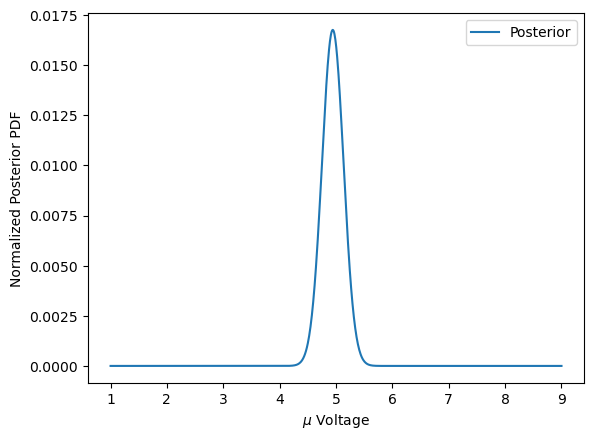

In [84]:
prior = uniform(loc=3, scale=4)
x_values = np.linspace(1, 9, 1000)
prior_pdf = prior.pdf(x_values)

def likelihood_funct(x, mean, sigma):
    return np.prod((1/np.sqrt(2*np.pi*(sigma**2))) * np.exp(-((x-mean)**2)/(2*(sigma**2))))

likelihood = [likelihood_funct(i,sample_mu,sample_sigma) for i in x_values]

posterior = likelihood * prior_pdf
posterior_norm1 = posterior/np.sum(posterior)

plt.plot(x_values, posterior_norm1, label='Posterior')
plt.legend()
plt.xlabel(r'$\mu$ Voltage')
plt.ylabel('Normalized Posterior PDF')

In [85]:
def create_cdf(pdf, sort=False):
    if sort:
        return np.sort(np.cumsum(pdf))
    else:
        return np.cumsum(pdf)
def get_cred_region(cr, cdf, xgrid):
    quant_range = [(1-cr)/2, (1+cr)/2]
    cond = [cdf>quant_range[0], cdf<quant_range[1]]
    lb, up = xgrid[cond[0]], xgrid[cond[1]]
    return lb[0], up[-1]


cdf_sorted = create_cdf(pdf=posterior_norm1, sort=True)
lower_bound, upper_bound = get_cred_region(cr=0.683, cdf=cdf_sorted, xgrid=x_values)

# Maximum A Posteriori (MAP) estimate
map_value = x_values[np.argmax(posterior_norm1)]
print(lower_bound, upper_bound, map_value)

4.747747747747748 5.124124124124124 4.93993993993994


In [86]:
print(sample_mu-sample_sigma , sample_mu+sample_sigma)

4.751551429176375 5.1326849996742325


4.771771771771771 5.124124124124124 4.93993993993994


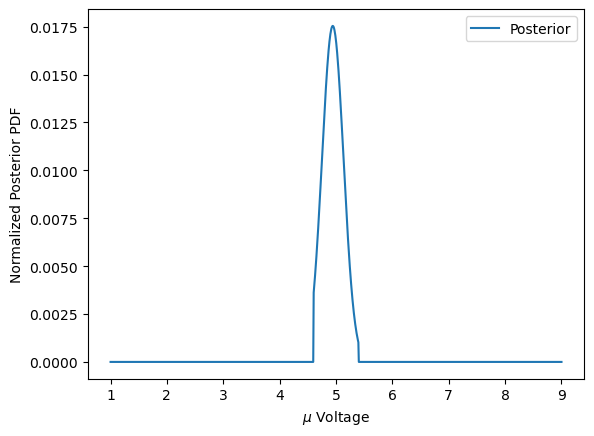

In [87]:
prior2 = uniform(loc=4.6, scale=5.4 - 4.6)
x_values = np.linspace(1, 9, 1000)
prior_pdf = prior2.pdf(x_values)

def likelihood_funct(x, mean, sigma):
    return np.prod((1/np.sqrt(2*np.pi*(sigma**2))) * np.exp(-((x-mean)**2)/(2*(sigma**2))))

likelihood = [likelihood_funct(i,sample_mu,sample_sigma) for i in x_values]

posterior = likelihood * prior_pdf
posterior_norm2 = posterior/np.sum(posterior)

plt.plot(x_values, posterior_norm2, label='Posterior')
plt.legend()
plt.xlabel(r'$\mu$ Voltage')
plt.ylabel('Normalized Posterior PDF')

def create_cdf(pdf, sort=False):
    if sort:
        return np.sort(np.cumsum(pdf))
    else:
        return np.cumsum(pdf)
def get_cred_region(cr, cdf, xgrid):
    quant_range = [(1-cr)/2, (1+cr)/2]
    cond = [cdf>quant_range[0], cdf<quant_range[1]]
    lb, up = xgrid[cond[0]], xgrid[cond[1]]
    return lb[0], up[-1]


cdf_sorted = create_cdf(pdf=posterior_norm2, sort=True)
lower_bound, upper_bound = get_cred_region(cr=0.683, cdf=cdf_sorted, xgrid=x_values)

# Maximum A Posteriori (MAP) estimate
map_value = x_values[np.argmax(posterior_norm2)]
print(lower_bound, upper_bound, map_value)

5.084084084084084 5.396396396396397 5.2442442442442445


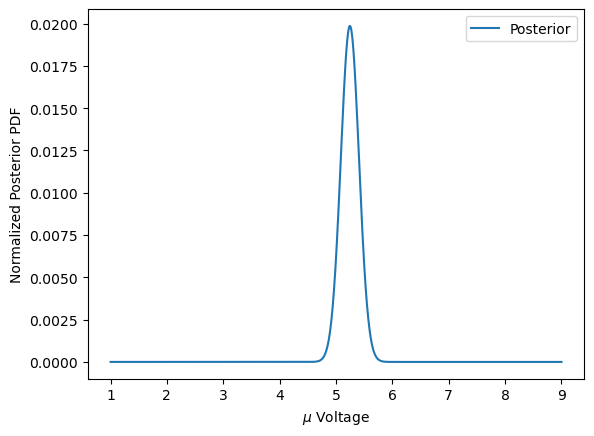

In [88]:
prior_pdf = norm.pdf(x_values,loc = 6, scale = 0.3)

def likelihood_funct(x, mean, sigma):
    return np.prod((1/np.sqrt(2*np.pi*(sigma**2))) * np.exp(-((x-mean)**2)/(2*(sigma**2))))

likelihood = [likelihood_funct(i,sample_mu,sample_sigma) for i in x_values]

posterior = likelihood * prior_pdf
posterior_norm3 = posterior/np.sum(posterior)

plt.plot(x_values, posterior_norm3, label='Posterior')
plt.legend()
plt.xlabel(r'$\mu$ Voltage')
plt.ylabel('Normalized Posterior PDF')

def create_cdf(pdf, sort=False):
    if sort:
        return np.sort(np.cumsum(pdf))
    else:
        return np.cumsum(pdf)
def get_cred_region(cr, cdf, xgrid):
    quant_range = [(1-cr)/2, (1+cr)/2]
    cond = [cdf>quant_range[0], cdf<quant_range[1]]
    lb, up = xgrid[cond[0]], xgrid[cond[1]]
    return lb[0], up[-1]


cdf_sorted = create_cdf(pdf=posterior_norm3, sort=True)
lower_bound, upper_bound = get_cred_region(cr=0.683, cdf=cdf_sorted, xgrid=x_values)

# Maximum A Posteriori (MAP) estimate
map_value = x_values[np.argmax(posterior_norm3)]
print(lower_bound, upper_bound, map_value)

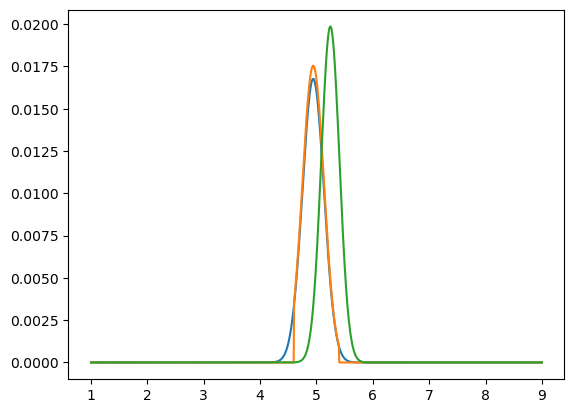

In [89]:
plt.plot(x_values,posterior_norm1)
plt.plot(x_values,posterior_norm2)
plt.plot(x_values,posterior_norm3)

4.867867867867868 4.931931931931931 4.93993993993994


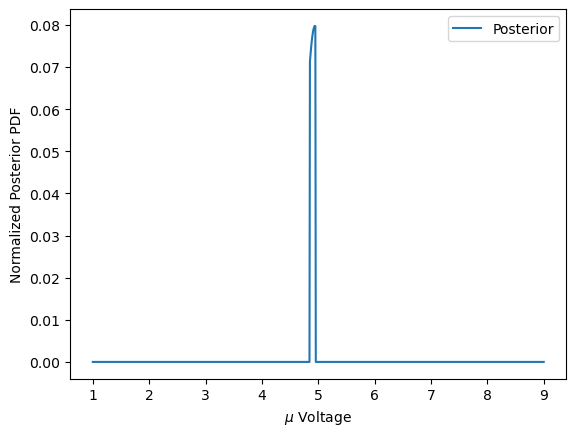

In [90]:
def prior4(x):
    if round(x,1) == round(sample_mu,1):
        return 1
    else:
        return 0
        
prior_pdf = np.array([prior4(i) for i in x_values])

def likelihood_funct(x, mean, sigma):
    return np.prod((1/np.sqrt(2*np.pi*(sigma**2))) * np.exp(-((x-mean)**2)/(2*(sigma**2))))

likelihood = [likelihood_funct(i,sample_mu,sample_sigma) for i in x_values]

posterior = likelihood * prior_pdf
posterior_norm4 = posterior/np.sum(posterior)

plt.plot(x_values, posterior_norm4, label='Posterior')
plt.legend()
plt.xlabel(r'$\mu$ Voltage')
plt.ylabel('Normalized Posterior PDF')

def create_cdf(pdf, sort=False):
    if sort:
        return np.sort(np.cumsum(pdf))
    else:
        return np.cumsum(pdf)
def get_cred_region(cr, cdf, xgrid):
    quant_range = [(1-cr)/2, (1+cr)/2]
    cond = [cdf>quant_range[0], cdf<quant_range[1]]
    lb, up = xgrid[cond[0]], xgrid[cond[1]]
    return lb[0], up[-1]


cdf_sorted = create_cdf(pdf=posterior_norm4, sort=True)
lower_bound, upper_bound = get_cred_region(cr=0.683, cdf=cdf_sorted, xgrid=x_values)

# Maximum A Posteriori (MAP) estimate
map_value = x_values[np.argmax(posterior_norm4)]
print(lower_bound, upper_bound, map_value)

In [91]:
BF = np.trapezoid(posterior_norm1, x_values)/np.sum(posterior_norm4)
#print(max(posterior_norm1) , max(posterior_norm2) , max(posterior_norm3) , max(posterior_norm4))
print(BF)
print('The delta prior model is favoured')

0.008008008008008008
The delta prior model is favoured


## Problem 2

This problem uses a dataset in `/coursework/homeworks/hw_data/`.

1) Read in `hw4_data_2.npy`, which is a (3 x 20) numpy array that you used in `Lecture_9`. Set `x, y, sigma_y = data`. 

We're going to do some polynomial fits to this data just like in `Lecture 9`. However, in all cases you should **keep the $y$-intercept fixed at $-0.23$**. 

2) Use the following code to compute the un-normalized posterior pdf (i.e. just the likelihood x prior) on a grid of the linear coefficient (i.e. the slope) of a linear model, with a uniform prior between 0.5 and 1.5. Plot this posterior pdf. Remember this is just a one-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100.

In [92]:
import scipy
def polynomial_fit(theta, x):
    return sum(t * x ** n for (n, t) in enumerate(theta))
def logL(theta, data, model=polynomial_fit):
    x, y, sigma_y = data
    y_fit = model(theta, x)
    return sum(scipy.stats.norm.logpdf(*args) 
               for args in zip(y, y_fit, sigma_y))

3) Using your 1D gridded likelihood-x-prior, compute the Bayesian evidence of this linear model. This may be a big number!

4) Now compute the joint 2D posterior pdf (again just the likelihood x prior) of linear and quadratic coefficients of a quadratic model. Give the linear coefficient a uniform prior between 0.5 and 1.5. Give the quadratic coefficient a uniform prior between -1 and 0.25. Plot this two-dimensional posterior. Remember this is a two-dimensional model because the $y$-intercept is fixed. I advise a grid size of 100 in each model dimension.

5) Using your 2D gridded likelihood-x-prior, compute the Bayesian evidence of the quadratic model. 

6) Calculate the Bayes factor for a linear versus quadratic model. How does this compare/contrast with the BIC model comparison in the lecture? 

### Solution

#### Part 1

In [93]:
data_Q2 = np.load('../../../homeworks/hw_data/hw4_data_2.npy')

x, y, sigma_y = data_Q2

#### Part 2

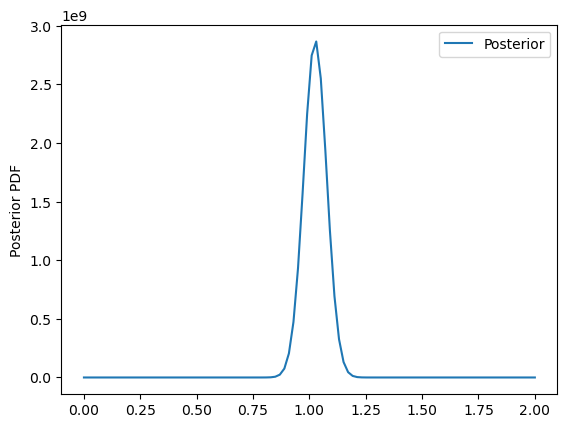

In [94]:
def prior1(x):
    if x>=0.5 and x<=1.5: #0.5<=theta<=1.5:
        return 1.0/(1.5-0.5)
    else:
        return 0    
    
theta_values = np.linspace(0, 2, 100)

prior = np.array([prior1(i) for i in theta_values])
likelihood = [np.exp(logL([-0.23, i], data_Q2)) for i in theta_values]
post = prior * likelihood

plt.plot(theta_values, post, label='Posterior', color='tab:blue')
plt.legend()
plt.ylabel('Posterior PDF')


plt.show()

#### Part 3

In [95]:
evidence1 = np.sum(post) * (theta_values[1]-theta_values[0])

print("The Bayesian evidence of this linear model is: ", evidence1)

The Bayesian evidence of this linear model is:  365684733.1606595


#### Part 4

In [96]:
theta_1 = np.linspace(0, 2, 100)
theta_2 = np.linspace(-1.5, 0.75, 100)

theta_grid2d_1, theta_grid2d_2 = np.meshgrid(theta_1, theta_2)

def prior2(x):
    if x>=-1 and x<=0.25:
        return 1.0/(0.25-(-1))
    else:
        return 0 

prior2_t = np.array([prior2(i) for i in theta_2])

post2 = np.zeros((100,100))

for i in range(len(theta_grid2d_1)):
    for j in range(len(theta_grid2d_2)):

        ln_lik = logL([-0.23, theta_grid2d_1[i][j], theta_grid2d_2[i][j]], data_Q2)
        post2[i][j] = np.exp(ln_lik) * prior1(theta_grid2d_1[i][j]) * prior2(theta_grid2d_2[i][j])


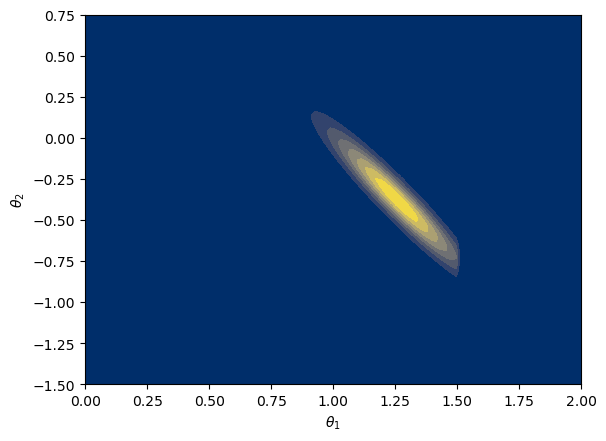

In [97]:
hist2d = plt.contourf(theta_grid2d_1, theta_grid2d_2, post2, cmap='cividis')
plt.xlabel(r'$\theta_{1}$')
plt.ylabel(r'$\theta_{2}$')

plt.show()

#### Part 5

In [98]:
evidence2 = np.sum(post2) * (theta_values[1]-theta_values[0]) * (theta_2[1]-theta_2[0])
print(evidence2)

493339495.45811105


#### Part 6

In [99]:
print("BF:", evidence1/evidence2)

BF: 0.7412435787673711


In [100]:
print('BIC',17.31/18.45)

BIC 0.9382113821138212
